In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import datetime 
from pickle import dump

sns.set(rc={'figure.figsize':(25,8)})

In [2]:
df = pd.read_csv("/Users/ben/python_projects/LSTM_weather/data/gold_price.csv", parse_dates=["Date"], index_col=["Date"])

In [3]:
df.shape

(2072, 6)

In [4]:
df.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2014-01-01,29542,29435,29598,29340,2930,0.25
2014-01-02,29975,29678,30050,29678,3140,1.47
2014-01-03,29727,30031,30125,29539,3050,-0.83
2014-01-04,29279,29279,29279,29279,0,-1.51
2014-01-06,29119,29300,29395,29051,24380,-0.55


<AxesSubplot: xlabel='Date', ylabel='Price'>

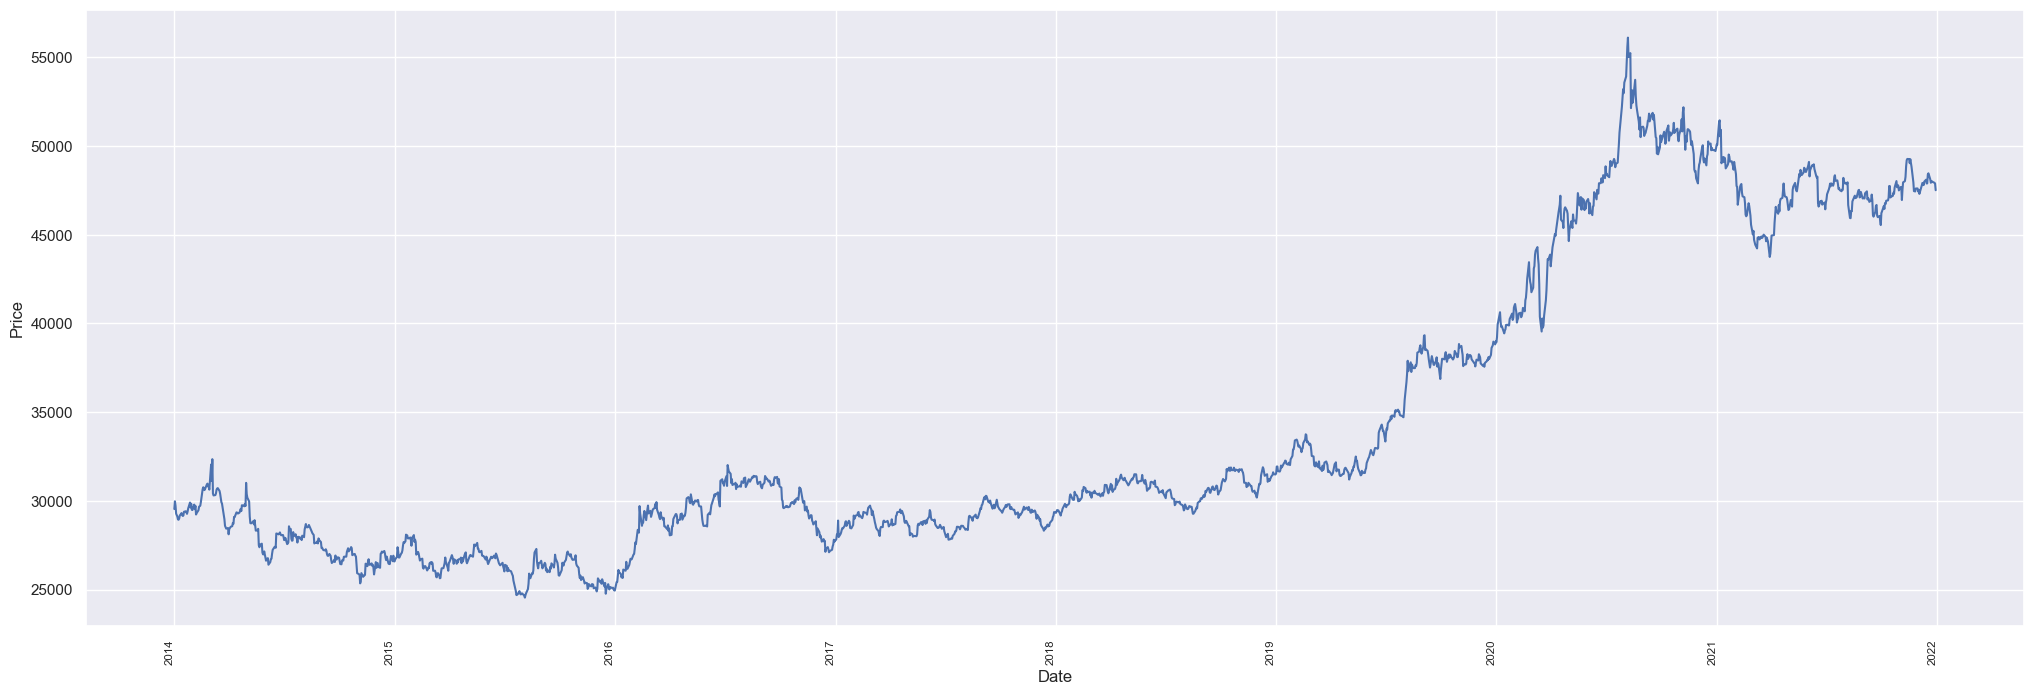

In [6]:
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small' 
)

sns.lineplot(df.Price)

In [53]:
# Divide data into three categories: train, test, split
df_test = df.loc[:datetime.datetime(year=2015, month=5, day=26, hour=23)]
df_train = df.loc[datetime.datetime(year=2015, month=5, day=26, hour=23):datetime.datetime(year=2020, month=9, day=28, hour=23)]
df_val = df.loc[datetime.datetime(year=2020, month=9, day=28, hour=23):]

In [54]:
print(len(df_train),
len(df_val),
len(df_test))

1373 324 375


In [62]:
# Define scaler
scaler = MinMaxScaler()

In [66]:
# Train transformer
transformer = scaler.fit([df_train.iloc[0,:]])

In [57]:
df_train = pd.DataFrame(transformer.transform(df_train), columns=["Price", "Open", "High", "Low", "Volume", "Ch%"])
df_val = pd.DataFrame(transformer.transform(df_val), columns=["Price", "Open", "High", "Low", "Volume", "Ch%"])
df_test = pd.DataFrame(transformer.transform(df_test), columns=["Price", "Open", "High", "Low", "Volume", "Ch%"])

In [59]:
df_test.describe()

,Price,Open,High,Low,Volume,Ch%
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.100993,0.098978,0.102483,0.100175,0.118866,0.512438
std,0.043251,0.042202,0.043053,0.043319,0.071662,0.091180
min,0.025434,0.027229,0.029281,0.021112,-0.000187,-0.033914
25%,0.067861,0.066545,0.070032,0.066295,0.080075,0.471127
50%,0.089953,0.087698,0.092079,0.089945,0.126567,0.513291
75%,0.127360,0.125897,0.130053,0.129551,0.158138,0.551329
max,0.247244,0.217735,0.246830,0.214032,0.470159,0.938588


In [58]:
df_train.describe()

,Price,Open,High,Low,Volume,Ch%
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,0.253063,0.250238,0.253528,0.254677,0.126159,0.518655
std,0.204836,0.203298,0.205103,0.205933,0.115271,0.075661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136260,0.133688,0.136016,0.136922,0.060150,0.478460
50%,0.187128,0.183518,0.186417,0.188490,0.098223,0.516957
75%,0.269574,0.265424,0.270211,0.272874,0.160430,0.558203
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# Learn transformers
open_transformer = open_scaler.fit(df_train[['Open']])
high_transformer = high_scaler.fit(df_train[['High']])
low_transformer = low_scaler.fit(df_train[['Low']])
close_transformer = close_scaler.fit(df_train[['Close']])
volume_transformer = volume_scaler.fit(df_train[['Volume']])

In [60]:
dump(transformer, open('scaler_gold.pkl', 'wb'))

In [39]:
# Scale train dataset
df_train["Open"] = open_transformer.transform(df_train[['Open']])
df_train["High"] = high_transformer.transform(df_train[['High']])
df_train["Low"] = low_transformer.transform(df_train[['Low']])
df_train["Close"] = close_transformer.transform(df_train[['Close']])
df_train["Volume"] = volume_transformer.transform(df_train[['Volume']])

/var/folders/dh/4jv6dld92fg59lcxnqzp62tc0000gn/T/ipykernel_40756/973539592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Open"] = open_transformer.transform(df_train[['Open']])
/var/folders/dh/4jv6dld92fg59lcxnqzp62tc0000gn/T/ipykernel_40756/973539592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["High"] = high_transformer.transform(df_train[['High']])
/var/folders/dh/4jv6dld92fg59lcxnqzp62tc0000gn/T/ipykernel_40756/973539592.py:4: SettingWithCopyWarning: 
A value is trying to

In [43]:
# Scale val dataset
df_val["Open"] = open_transformer.transform(df_val[['Open']])
df_val["High"] = high_transformer.transform(df_val[['High']])
df_val["Low"] = low_transformer.transform(df_val[['Low']])
df_val["Close"] = close_transformer.transform(df_val[['Close']])
df_val["Volume"] = volume_transformer.transform(df_val[['Volume']])

ValueError: cannot set a row with mismatched columns

In [41]:
 # Scale train dataset
df_test["Open"] = open_transformer.transform(df_test[['Open']])
df_test["High"] = high_transformer.transform(df_test[['High']])
df_test["Low"] = low_transformer.transform(df_test[['Low']])
df_test["Close"] = close_transformer.transform(df_test[['Close']])
df_test["Volume"] = volume_transformer.transform(df_test[['Volume']])

/var/folders/dh/4jv6dld92fg59lcxnqzp62tc0000gn/T/ipykernel_40756/1828702951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Open"] = open_transformer.transform(df_test[['Open']])
/var/folders/dh/4jv6dld92fg59lcxnqzp62tc0000gn/T/ipykernel_40756/1828702951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["High"] = high_transformer.transform(df_test[['High']])
/var/folders/dh/4jv6dld92fg59lcxnqzp62tc0000gn/T/ipykernel_40756/1828702951.py:4: SettingWithCopyWarning: 
A value is trying to 

In [61]:
df_train.to_csv("gold_train.csv")
df_val.to_csv("gold_val.csv")
df_test.to_csv("gold_test.csv")